In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

multi_class='ovr' 意味着默认对于多分类问题使用的是ovr

如果想使用ovo需要显示的指定LogisticRegression(multi_class="multinomial", solver="newton-cg")

### 通常ovo效果好一些

In [4]:
log_reg.score(X_test, y_test)


0.65789473684210531

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


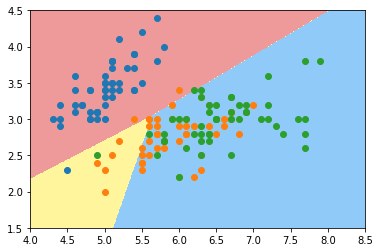

In [9]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## 使用OVO进行多分类

In [10]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")


In [11]:
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

0.78947368421052633

D:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


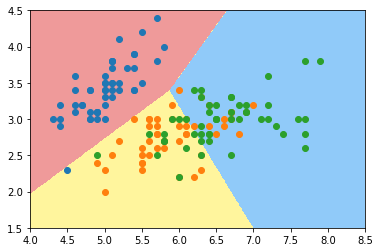

In [12]:

plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### 使用所有的数据

In [13]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.94736842105263153

In [15]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

1.0

### sklearn中的oVR和OVO

In [16]:
from sklearn.multiclass import OneVsRestClassifier

In [19]:
log_reg_ovr = OneVsRestClassifier(log_reg)

In [20]:
log_reg_ovr.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [21]:
log_reg_ovr.score(X_test,y_test)

0.94736842105263153

In [22]:
from sklearn.multiclass import OneVsOneClassifier

In [23]:
log_reg_ovo = OneVsOneClassifier(log_reg)

In [24]:
log_reg_ovo.fit(X_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [26]:
log_reg_ovo.score(X_test,y_test)

1.0